In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression

In [4]:
# Load the dataset with a different encoding
file_path = r"D:\Internship-Codsoft\CODSOFT-main\CODSOFT-main\MOVIE_RATING\tested2.csv"
df = pd.read_csv(file_path, encoding='latin-1')  # or encoding='ISO-8859-1'


In [5]:
# Handling missing values
df['Rating'].fillna(df['Rating'].mean(), inplace=True)


In [6]:
# Feature Engineering
features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
X = pd.get_dummies(df[features])
y = df['Rating']


In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Model selection and training
model = LinearRegression()
model.fit(X_train, y_train)


In [ ]:
# Predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 2.8404347563369262e+26


Text(0.5, 1.0, 'Actual vs. Predicted Ratings')

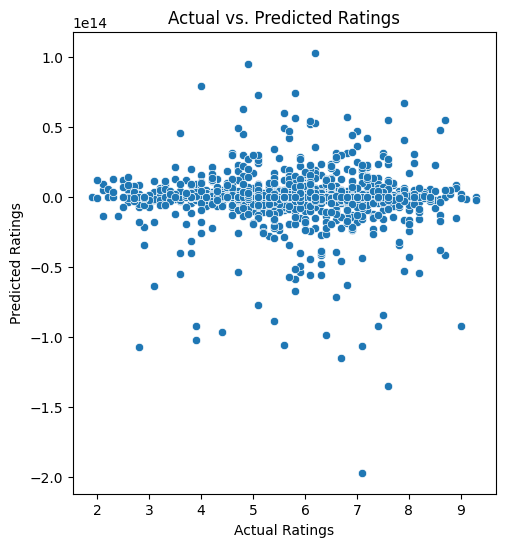

In [ ]:
# Visualize actual vs. predicted ratings
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')


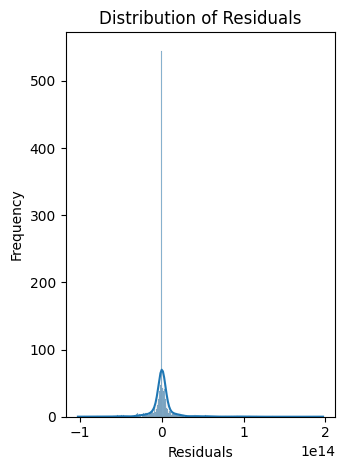

In [ ]:
# Visualize residuals
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

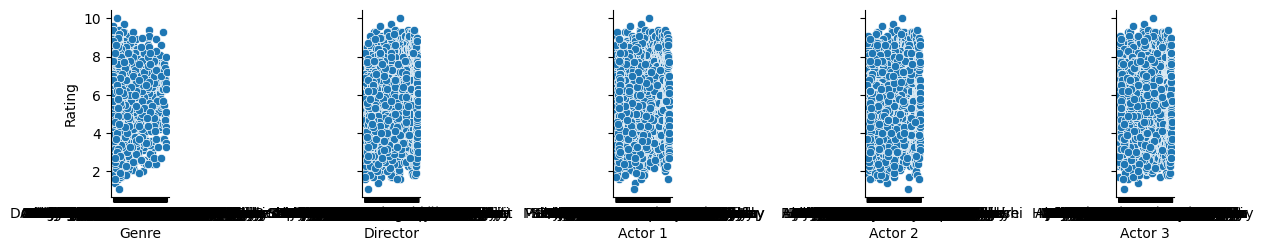

In [ ]:
# Visualizations
# 1. Pairplot to visualize relationships between features and ratings
sns.pairplot(df, x_vars=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], y_vars='Rating', kind='scatter')
plt.show()

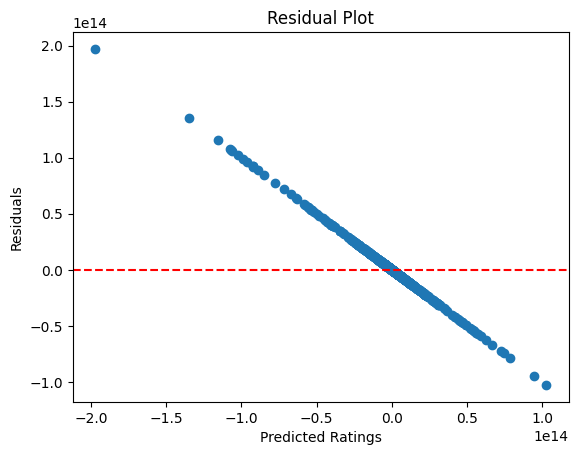

In [ ]:
# 2. Residual plot to check for homoscedasticity
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [ ]:
# Feature Importance Analysis
f_scores, _ = f_regression(X_train_scaled, y_train)
feature_importance = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores})
feature_importance = feature_importance.sort_values(by='F-Score', ascending=False)


In [2]:
# Display the top N important features
top_features = 5
print(f'Top {top_features} Important Features:')
print(feature_importance.head(top_features))

Top 5 Important Features:


NameError: name 'feature_importance' is not defined